In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\xiexi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\xiexi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\xiexi\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\xiexi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\xiexi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\xiexi\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\xiexi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\xiexi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\xiexi\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\xiexi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\xiexi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\xiexi\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

First step would be an overview of the data:

In [2]:
loan_data = pd.read_csv("data/Part 2.loan_data_final.csv")
loan_data = loan_data.iloc[:,1:]
loan_data.dtypes

person_age                          int64
person_gender                      object
person_education                   object
person_income                       int64
person_emp_exp                      int64
person_home_ownership              object
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length          int64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_to_income_ratio              float64
loan_type                          object
dependents_count                    int64
regional_unemployment_rate        float64
borrower_risk_score               float64
loan_status                         int64
dtype: object

In [3]:
loan_data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_to_income_ratio              0
loan_type                         0
dependents_count                  0
regional_unemployment_rate        0
borrower_risk_score               0
loan_status                       0
dtype: int64

In [4]:
loan_data.shape

(45000, 18)

In [5]:
X = loan_data.iloc[:,:17]
Y = loan_data.iloc[:,17:18]

Given it's a mix of numerical and categorical, we need to seperate them into 2 different categories

In [6]:
numerical_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

First we do an analysis of the numerical data:

In [7]:
loan_data[numerical_features].describe()

,person_age,person_income,person_emp_exp,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_to_income_ratio,dependents_count,regional_unemployment_rate,borrower_risk_score
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,11.006606,0.139725,5.867489,632.608756,0.139726,1.052533,5.738823,317.963033
std,6.045108,8.042250e+04,6.063532,2.978808,0.087212,3.879702,50.435865,0.087212,1.122943,1.296174,25.443032
min,20.000000,8.000000e+03,0.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000,3.500000,196.900000
25%,24.000000,4.720400e+04,1.000000,8.590000,0.070000,3.000000,601.000000,0.070000,0.000000,4.620000,302.200000
50%,26.000000,6.704800e+04,4.000000,11.010000,0.120000,4.000000,640.000000,0.120000,1.000000,5.730000,321.400000
75%,30.000000,9.578925e+04,8.000000,12.990000,0.190000,8.000000,670.000000,0.190000,2.000000,6.860000,336.500000
max,144.000000,7.200766e+06,125.000000,20.000000,0.660000,30.000000,850.000000,0.660000,4.000000,8.000000,432.500000


Checking the distribution of the numerical data and their correlations

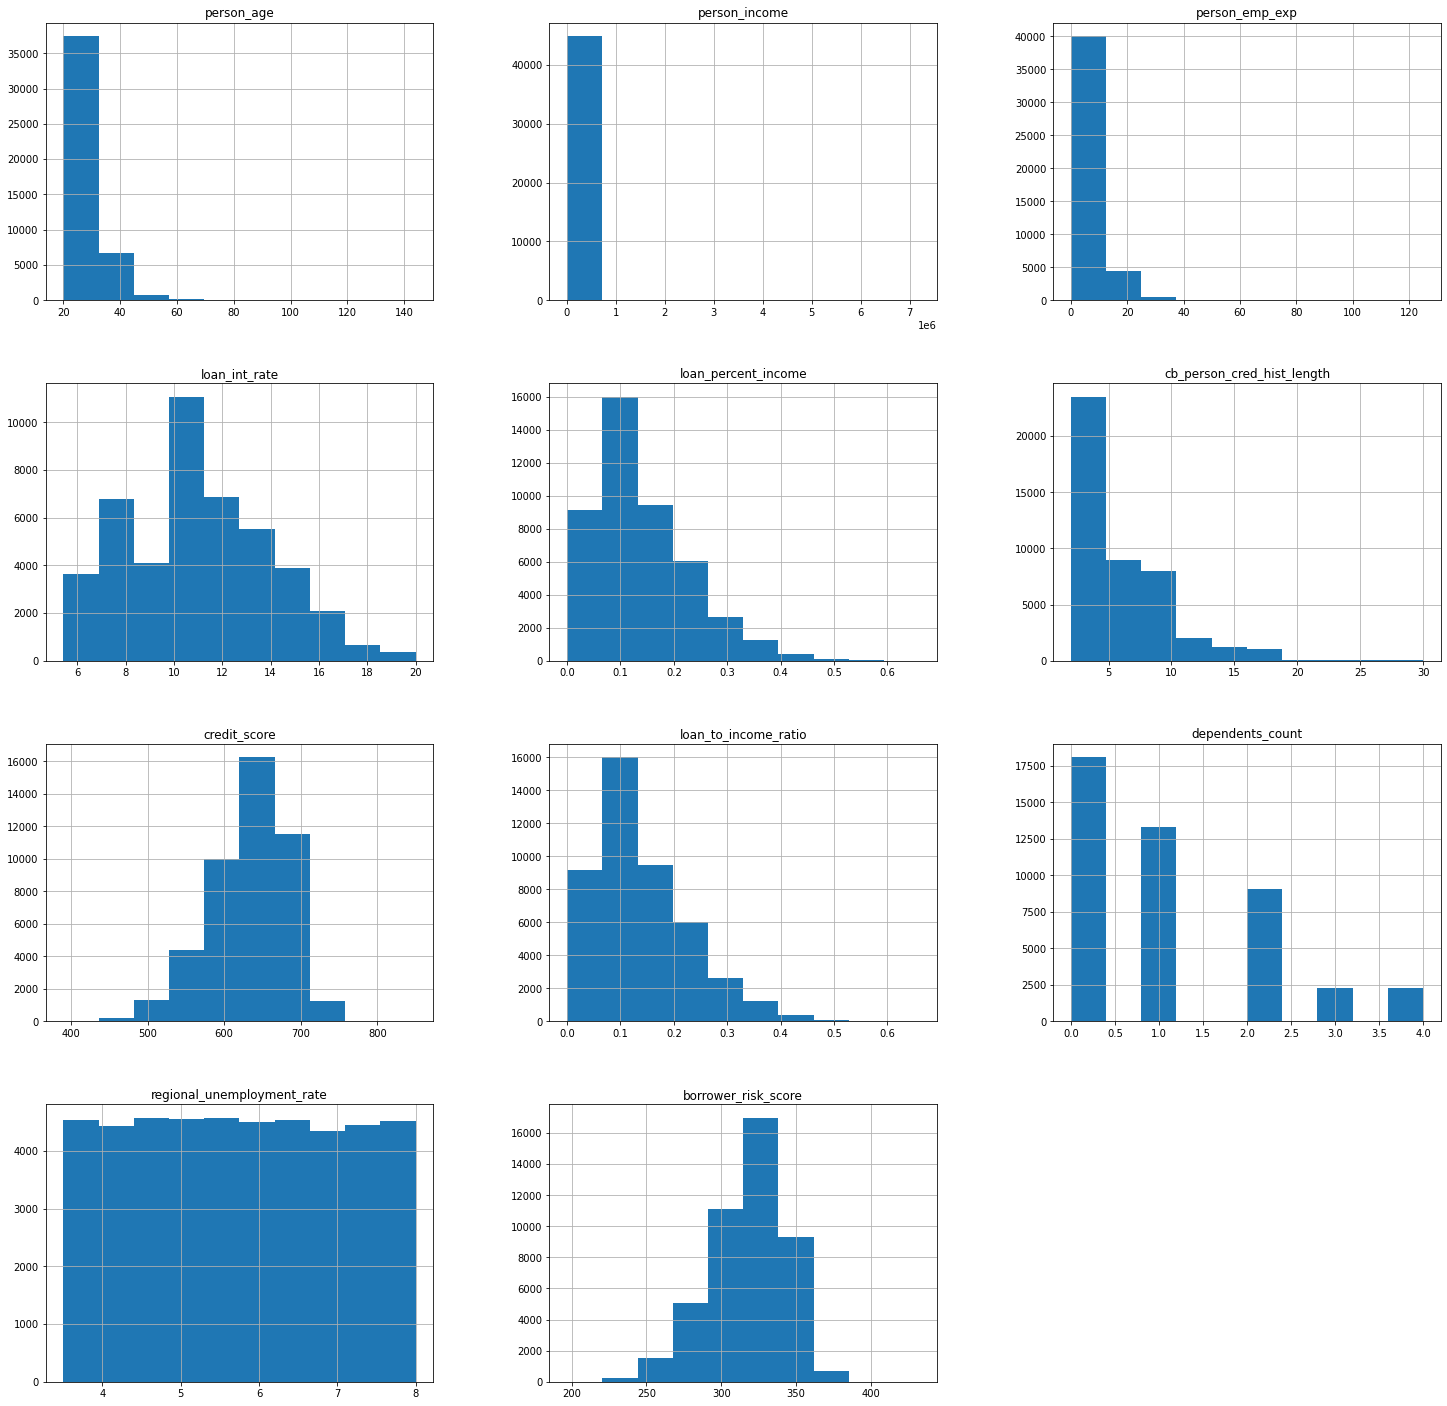

In [8]:
loan_data[numerical_features].hist(figsize = (25,25))
plt.show()

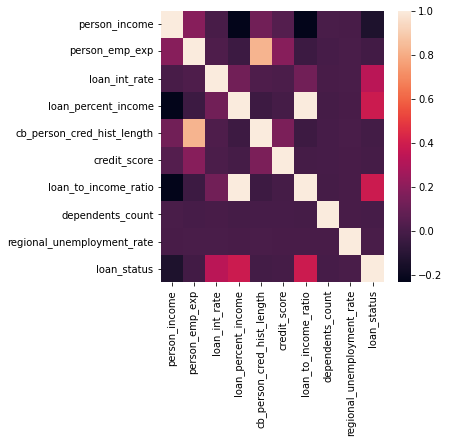

In [36]:
fig, ax = plt.subplots(figsize = (5,5))
corr_matrix = loan_data[numerical_features + ["loan_status"]].corr()
corr_heatmap = sns.heatmap(corr_matrix)
plt.show()

Analyzing Categorical Features:

In [10]:
def categorical_valcount_hist(feature):
    print(loan_data[feature].value_counts())
    fig,ax = plt.subplots(figsize = (5,5))
    sns.countplot(x = feature, ax = ax, data = loan_data)
    plt.show()
    

person_gender
male      24841
female    20159
Name: count, dtype: int64


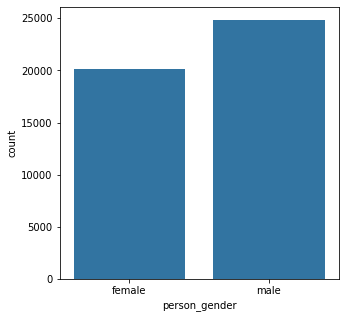

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64


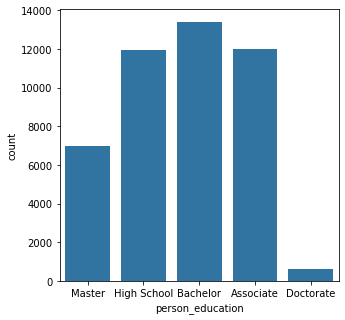

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64


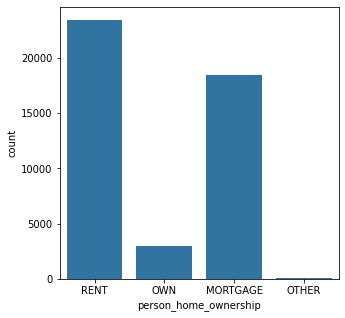

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64


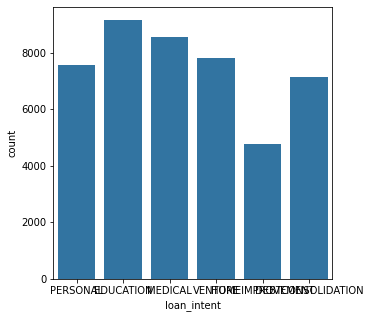

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


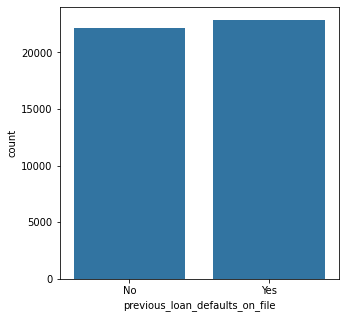

loan_type
FIXED       26052
FLOATING    18948
Name: count, dtype: int64


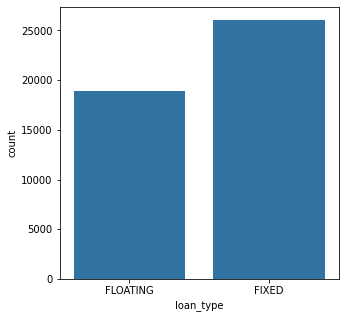

In [11]:
for i in categorical_features:
    categorical_valcount_hist(i)

Machine learnign training part

Given the nature of the data, it's a mix of numerical and categorical and the result is 0 or 1 based. Features are mostly uncorrelated. The best method will be using random forest or any decision tree based models such as boosting. 

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y)

Feature Engineering

First drop highly correlated features:

In [14]:
numerical_features = numerical_features[1:10]

In [15]:
#data is heavily skewed, will use median instead of mean
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())  
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

Apply model, parameters can be optimized with an optimizer or simply trial and errror.

In [30]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 500, criterion='gini', max_depth = 10, min_samples_leaf=5))
])
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

C:\Users\xiexi\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print(f"Recall: { round(recall_score(Y_test, Y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(Y_test, Y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(Y_test, Y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(Y_test, Y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(Y_test, Y_pred)*100, 4) }")
print(classification_report(Y_test, Y_pred))

Recall: 74.15
Precision: 91.0374
F1-Score: 81.7305
Accuracy score: 92.6333
AUC Score: 86.0321
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7000
           1       0.91      0.74      0.82      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.86      0.89      9000
weighted avg       0.93      0.93      0.92      9000



To understand which feature played a heavy role:

In [18]:

perm_importance = permutation_importance(
model, X_test, Y_test, n_repeats = 10
)

In [20]:
perm_df = pd.DataFrame(
{'Feature' : X_test.columns,
 'Importance': perm_importance.importances_mean    
}).sort_values('Importance', ascending = False)

In [21]:
perm_df

,Feature,Importance
11,previous_loan_defaults_on_file,0.106356
7,loan_int_rate,0.052233
5,person_home_ownership,0.034678
3,person_income,0.028678
6,loan_intent,0.015722
12,loan_to_income_ratio,0.013322
8,loan_percent_income,0.012756
10,credit_score,0.006156
1,person_gender,0.001300
15,regional_unemployment_rate,0.001089
